In [2]:
from PIL import Image
import os, glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import numpy as np

## 먼저 기존의 np.load를 np_load_old에 저장해둠.
np_load_old = np.load

## 기존의 parameter을 바꿔줌
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

X_train, X_test, y_train, y_test = np.load('./Pictures/imagecrowling/blink_data2.npy')
print(X_train.shape)


(2586, 26, 34, 1)


In [4]:
import keras

image_w = 26
image_h = 34
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

model = keras.models.Sequential()
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './Pictures/imagecrowling/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = model_dir + "/open_close_classify2.model"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 4, 64)         

In [5]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.15, callbacks=[checkpoint, early_stopping])

Epoch 1/100
34/35 [============================>.] - ETA: 0s - loss: 0.6338 - accuracy: 0.6324
Epoch 00001: val_loss improved from inf to 0.41598, saving model to ./Pictures/imagecrowling/model\open_close_classify2.model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./Pictures/imagecrowling/model\open_close_classify2.model\assets
35/35 [==============================] - 7s 192ms/step - loss: 0.6318 - accuracy: 0.6347 - val_loss: 0.4160 - val_accuracy: 0.8428
Epoch 2/100
34/35 [============================>.] - ETA: 0s - loss: 0.3502 - accuracy: 0.8653
Epoch 00002: val_loss improved from 0.41598 to 0.25518, saving model to ./Pictures/imagecrowling/model\open_close_classify2.model
INFO:tensorflow:Assets written to: ./Pictures/imagecrowling/model\open_close_classify2.mo

In [6]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

9/9 [==============================] - 0s 12ms/step - loss: 0.0943 - accuracy: 0.9826
정확도 : 0.98 


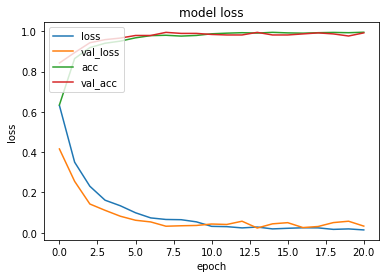

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'], loc='upper left')
plt.show()

In [32]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

import tensorflow as tf


img_dir = './Pictures/imagecrowling/img_test'


image_w = 26
image_h = 34

pixels = image_w * image_h * 1

X = []
filenames = []
files = glob.glob(img_dir+"/*.jpg")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)

X = np.array(X)
X = X.astype(float) / 255
model = load_model('./Pictures/imagecrowling/model/open_close_classify2.model')
ev=model.predict(X)
print(ev)

ValueError: in user code:

    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\swc03\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 34, 26, 3]
